<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Data Mining</b></center>
<center><b><h1>Lab - 3</b></center>
<pre>

### 1)  First, you need to read the titanic dataset from local disk and display first five records



In [2]:
import pandas as pd

In [3]:
f = pd.read_csv("titanic.csv")
f

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
top = f.head()
top

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2)  Identify Nominal, Ordinal, Binary and Numeric attributes from data sets and display all values.



In [11]:

for col in f.columns:
    unique_vals = f[col].dropna().unique()
    num_unique = len(unique_vals)
    dtype = f[col].dtype

    if num_unique == 2:
        attr_type = 'Binary'
    elif dtype == 'object':
        attr_type = 'Nominal'
    elif pd.api.types.is_numeric_dtype(dtype):
        attr_type = 'Numeric'
    else:
        attr_type = 'Ordinal or Unknown'

    print(f"{col} ({attr_type}): {unique_vals}")


PassengerId (Numeric): [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241

### 3)  Identify symmetric and asymmetric binary attributes from data sets and display all values.



In [12]:

for col in f.columns:
    unique_vals = f[col].dropna().unique()
    
    if len(unique_vals) == 2:  
        print(f"\n🔹 Column: {col}")
        print(f"Values: {unique_vals}")

        if set(unique_vals) == {0, 1} or set(unique_vals) == {'Yes', 'No'}:
            print("This is probably an Asymmetric Binary attribute.")
        else:
            print("This is probably a Symmetric Binary attribute.")



🔹 Column: Survived
Values: [0 1]
This is probably an **Asymmetric Binary** attribute.

🔹 Column: Sex
Values: ['male' 'female']
This is probably a **Symmetric Binary** attribute.


### 4)  For each quantitative attribute, calculate its average, standard deviation, minimum, mode, range and maximum values.



In [23]:
a = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
for i in a:
    print(f"{i} : ")
    print("\tminimum = ",f[i].min())
    print("\tmaximum = ",f[i].max())
    print("\tmean = ",f[i].mean())
    print("\tmode = ",f[i].mode()[0])
    print("\tstandard deviation = ",f[i].std())
    print("\trange = ",(f[i].max()-f[i].min()))


PassengerId : 
	minimum =  1
	maximum =  891
	mean =  446.0
	mode =  1
	standard deviation =  257.3538420152301
	range =  890
Survived : 
	minimum =  0
	maximum =  1
	mean =  0.3838383838383838
	mode =  0
	standard deviation =  0.4865924542648585
	range =  1
Pclass : 
	minimum =  1
	maximum =  3
	mean =  2.308641975308642
	mode =  3
	standard deviation =  0.8360712409770513
	range =  2
Age : 
	minimum =  0.42
	maximum =  80.0
	mean =  29.69911764705882
	mode =  24.0
	standard deviation =  14.526497332334044
	range =  79.58
SibSp : 
	minimum =  0
	maximum =  8
	mean =  0.5230078563411896
	mode =  0
	standard deviation =  1.1027434322934275
	range =  8
Parch : 
	minimum =  0
	maximum =  6
	mean =  0.38159371492704824
	mode =  0
	standard deviation =  0.8060572211299559
	range =  6
Fare : 
	minimum =  0.0
	maximum =  512.3292
	mean =  32.204207968574636
	mode =  8.05
	standard deviation =  49.693428597180905
	range =  512.3292


### 6)  For the qualitative attribute (class), count the frequency for each of its distinct values.



In [26]:
f['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [27]:
f['Pclass'].value_counts().idxmax()

3

###  7) It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

In [32]:
# display non-numeric valued column with only unique,top,freq row data
f.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [29]:
#display all column with whole summary
f.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
#give only numeric valued column summary
f.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
#give specific column summary
f['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### 8)  For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.



In [36]:
f.cov(numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


In [37]:
f.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 9) Display the histogram for Age attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

<Axes: >

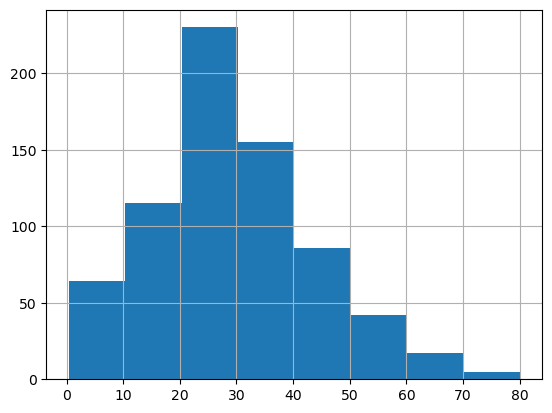

In [45]:
# x-axis : age & y-axis : frequency
import matplotlib.pyplot as plt
f['Age'].hist(bins=8)

### 10) A boxplot can also be used to show the distribution of values for each attribute.

<Axes: >

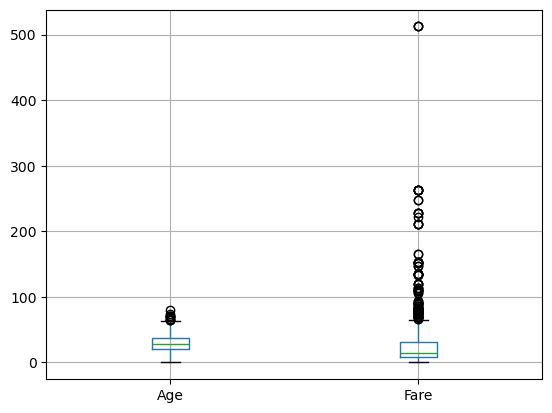

In [52]:
f[['Age','Fare']].boxplot()

### 11)  Display scatter plot for any 5 pair of attributes , we can use a scatter plot to visualize their joint distribution.

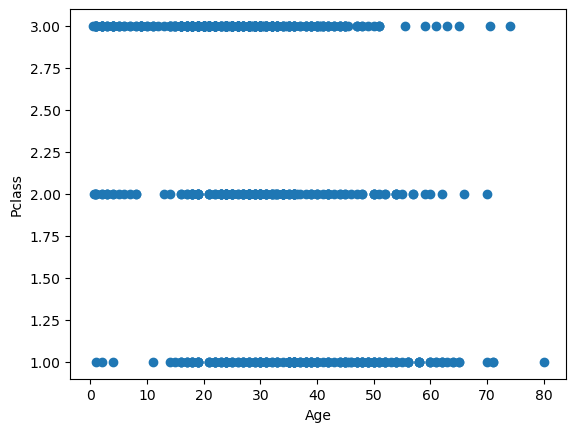

In [57]:
plt.scatter(f['Age'],f['Pclass'])
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()

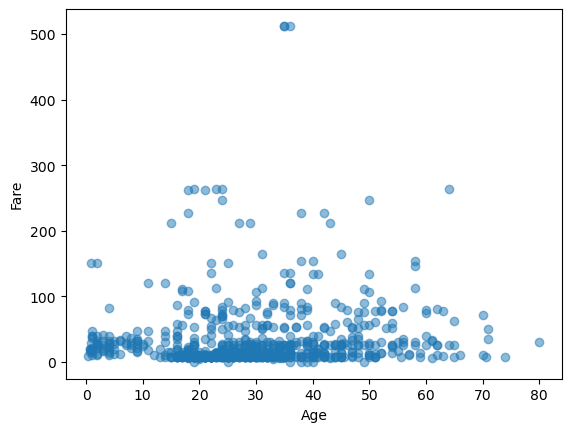

In [55]:
plt.scatter(f['Age'],f['Fare'],alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

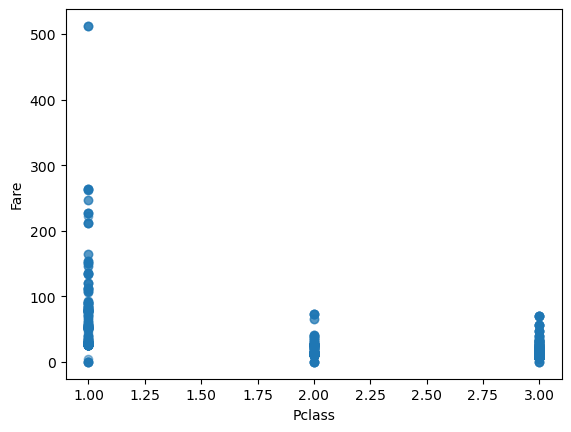

In [58]:
plt.scatter(f['Pclass'],f['Fare'],alpha=0.5)
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

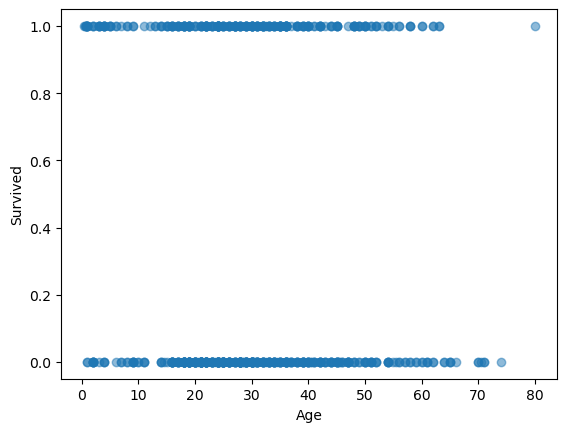

In [59]:
plt.scatter(f['Age'],f['Survived'],alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

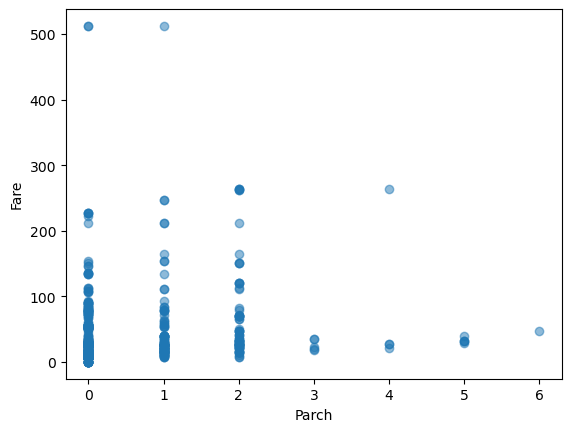

In [62]:
plt.scatter(f['Parch'],f['Fare'],alpha=0.5)
plt.xlabel('Parch')
plt.ylabel('Fare')
plt.show()

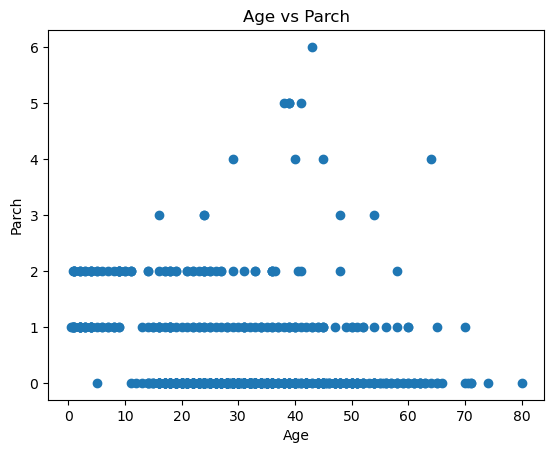

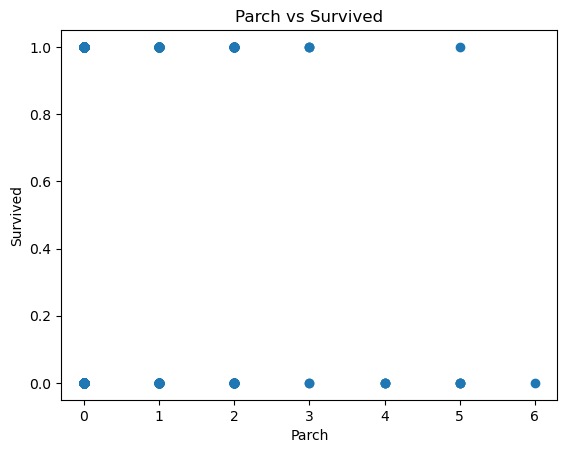

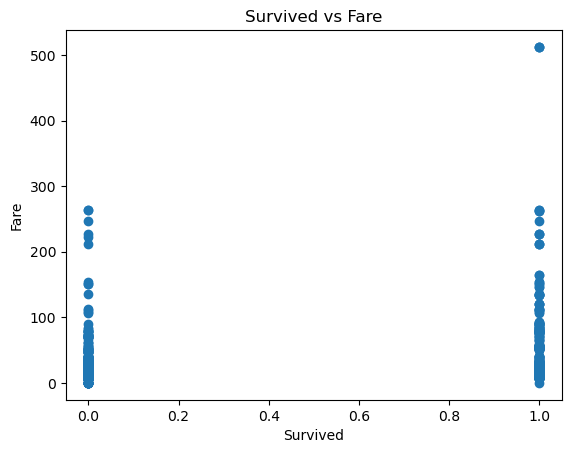

In [70]:
import matplotlib.pyplot as plt

a = ['Age', 'Parch', 'Survived', 'Fare']

for i in range(len(a) - 1):
    plt.scatter(f[a[i]], f[a[i+1]])
    plt.xlabel(a[i])
    plt.ylabel(a[i+1])
    plt.title(f"{a[i]} vs {a[i+1]}")
    plt.show()
